# 8.4 Exercises

## Exercise 9

This problem involves the `OJ` data set which is part of the `ISLR` package.

Before, we start tackling exercise, let's explore our `OJ` dataset. 

In [1]:
# load library & data
library(ISLR)
library(tree)
set.seed(111)
data(OJ)
head(OJ)

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


### Step (a)

> Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

First, we start by loading the `ISLR` package and then attach the `OJ` data. Next, we sample the dataset by creating the train index and filter the dataset to generate train and test observations.

In [2]:
# train and test split
train_index = sample(seq_len(nrow(OJ)), size = 800)
train = OJ[train_index,]
test = OJ[-train_index,]

### Step (b)

> Fit a tree to the training data, with `Purchase` as the response and the other variables except for `Buy` as predictors. Use the `summary()` function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [3]:
tree.oj = tree(Purchase~., data=train)
summary(tree.oj)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "SalePriceMM"   "ListPriceDiff" "PctDiscCH"    
Number of terminal nodes:  7 
Residual mean deviance:  0.7592 = 602 / 793 
Misclassification error rate: 0.16 = 128 / 800 

The tree has 7 leaf or terminal nodes and the Training Error Rate (Misclassification rate) is 0.16

### Step (c)

> Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

In [4]:
tree.oj

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1067.00 CH ( 0.61375 0.38625 )  
   2) LoyalCH < 0.48285 293  312.60 MM ( 0.22526 0.77474 )  
     4) LoyalCH < 0.276142 159  112.30 MM ( 0.11321 0.88679 ) *
     5) LoyalCH > 0.276142 134  174.80 MM ( 0.35821 0.64179 )  
      10) SalePriceMM < 2.04 72   73.69 MM ( 0.20833 0.79167 ) *
      11) SalePriceMM > 2.04 62   85.69 CH ( 0.53226 0.46774 ) *
   3) LoyalCH > 0.48285 507  448.70 CH ( 0.83826 0.16174 )  
     6) LoyalCH < 0.764572 240  289.70 CH ( 0.70833 0.29167 )  
      12) ListPriceDiff < 0.235 91  125.90 MM ( 0.47253 0.52747 )  
        24) PctDiscCH < 0.052007 80  107.70 MM ( 0.40000 0.60000 ) *
        25) PctDiscCH > 0.052007 11    0.00 CH ( 1.00000 0.00000 ) *
      13) ListPriceDiff > 0.235 149  124.70 CH ( 0.85235 0.14765 ) *
     7) LoyalCH > 0.764572 267   97.91 CH ( 0.95506 0.04494 ) *

One of the terminal nodes for example is 11) SalePriceMM > 2.04 62   85.69 CH ( 0.53226 0.46774 ). In order to explain this we can traverse the tree to get to that specofo node and provide relevant explanation.

The interpretation for that specific node is as following.

Customers whose brand loyalty is between 0.27 and 0.48 with Sales price for minute maid orange juice above 2.04 are more likely to purchase Citrus Hill juice.

### Step (d)

> Create a plot of the tree, and interpret the results.

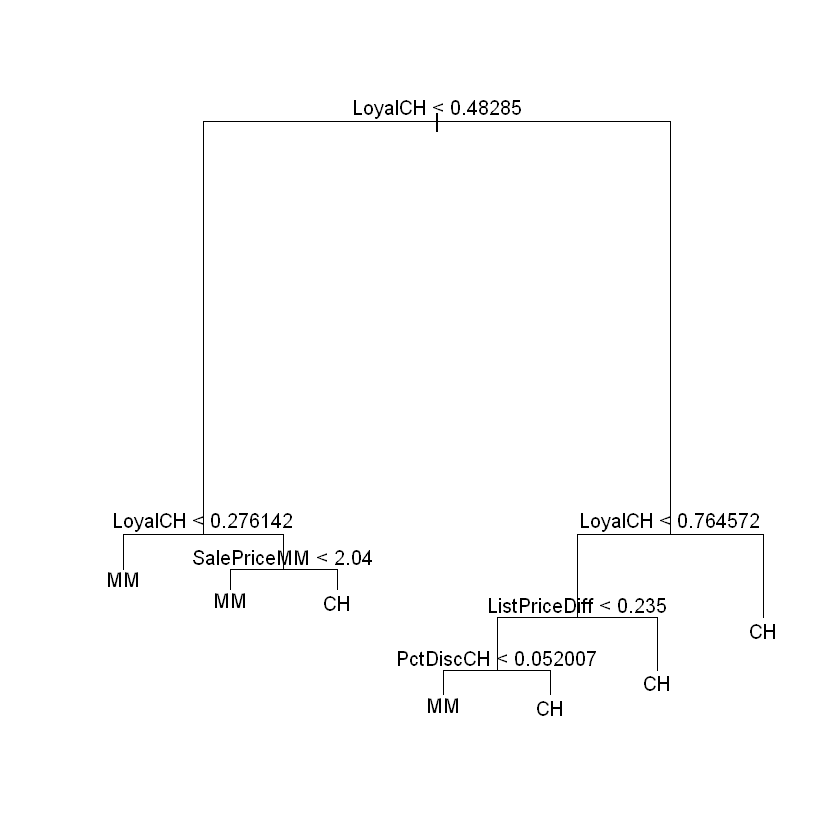

In [5]:
plot(tree.oj)
text(tree.oj, pretty=0)

### Step (e)

> Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [6]:
tree.pred = predict(tree.oj, test[,-1], type="class")
table(tree.pred, test[,1])
paste("The Test Error Rate for our tree model is", round((31+20)/nrow(test), 2) * 100, "%")

         
tree.pred  CH  MM
       CH 131  20
       MM  31  88

[1] "The Test Error Rate for our tree model is 19 %"

### Step (f)

> Apply the `cv.tree()` function to the training set in order to determine the optimal tree size

In [7]:
cv.treeoj = cv.tree(tree.oj, FUN=prune.misclass)
print(names(cv.treeoj))

[1] "size"   "dev"    "k"      "method"


### Step (g)

> Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

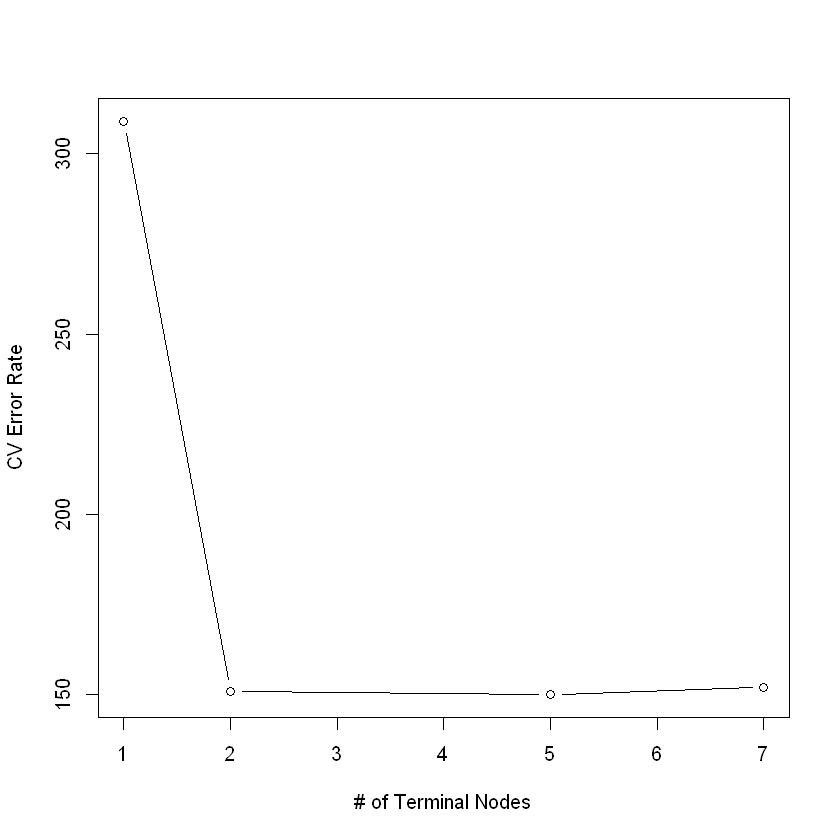

In [8]:
plot(cv.treeoj$size, cv.treeoj$dev, type="b", xlab="# of Terminal Nodes", ylab="CV Error Rate")

### Step (h)

> Which tree size corresponds to the lowest cross-validated classification error rate?

The optimal number of nodes where the minimum CV Error rate is the lowest is 7.

### Step (i)

> Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

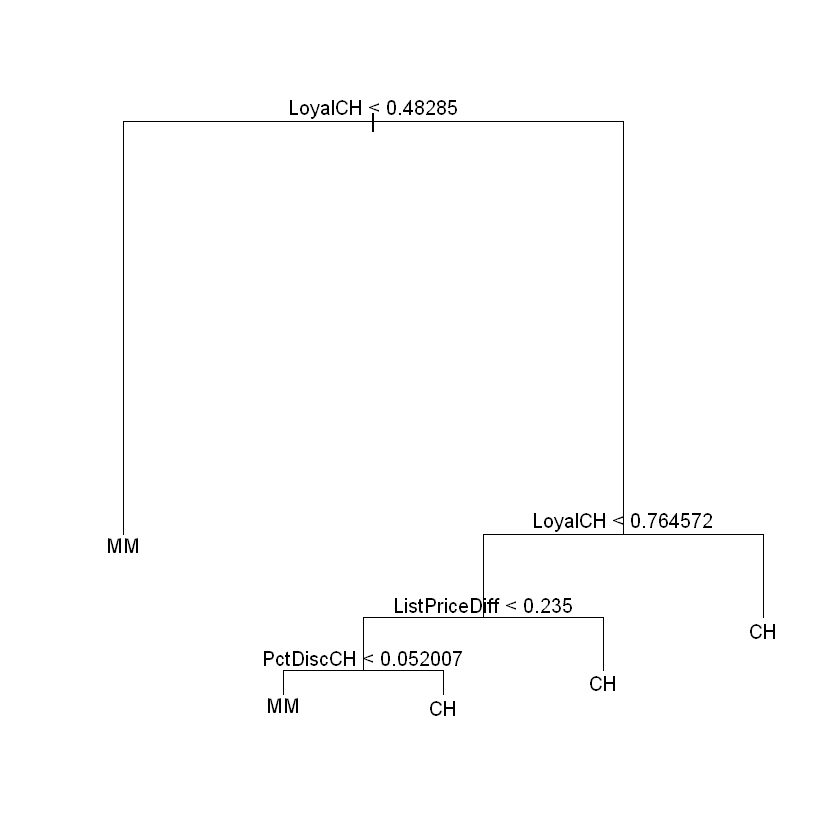

In [9]:
prune.treeoj = prune.misclass(tree.oj, best=5)
plot(prune.treeoj)
text(prune.treeoj,pretty=0)

### Step (j)

> Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [10]:
# train error rate full tree
tree.fulltrain = predict(tree.oj, train[,-1], type="class")
cmfull = table(tree.fulltrain, train[,1])
paste("The Train Error Rate for our tree model is", round(sum(cmfull[2], cmfull[3])/nrow(test), 2) * 100, "%")

# train error rate pruned tree
tree.prunetrain = predict(prune.treeoj, train[,-1], type="class")
cmprune = table(tree.prunetrain, train[,1])
paste("The Train Error Rate for our pruned tree model is", round(sum(cmprune[2], cmprune[3])/nrow(test), 2) * 100, "%")

[1] "The Train Error Rate for our tree model is 47 %"

[1] "The Train Error Rate for our pruned tree model is 49 %"

We can see that the pruned model has a higher train error rate but the difference between train error rate for full model vs pruned is not as much. The pruned model is less complex so it might generalize well. Next we will look at the test error rates.

### Step (k)

> Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [11]:
# train error rate full tree
tree.fulltest = predict(tree.oj, test[,-1], type="class")
cmfull = table(tree.fulltest, test[,1])
paste("The Train Error Rate for our tree model is", round(sum(cmfull[2], cmfull[3])/nrow(test), 2) * 100, "%")

# train error rate pruned tree
tree.prunetest = predict(prune.treeoj, test[,-1], type="class")
cmprune = table(tree.prunetest, test[,1])
paste("The Train Error Rate for our pruned tree model is", round(sum(cmprune[2], cmprune[3])/nrow(test), 2) * 100, "%")

[1] "The Train Error Rate for our tree model is 19 %"

[1] "The Train Error Rate for our pruned tree model is 20 %"

As we can see the test error rate of our prune model vs full model is only slightly higher which means that the less complex pruned model perfomrs better.

## Exercise 10

We now use boosting to predict `Salary` in the `Hitters` data set.

### Step (a)

> Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [12]:
data = Hitters[!is.na(Hitters$Salary),]
data$Salary = log(data$Salary)

### Step (b)

> Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [13]:
train_index = sample(seq_len(nrow(data)), size = 200)
train = data[train_index,]
test = data[-train_index,]

### Step (c)

> Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

Loaded gbm 2.1.5


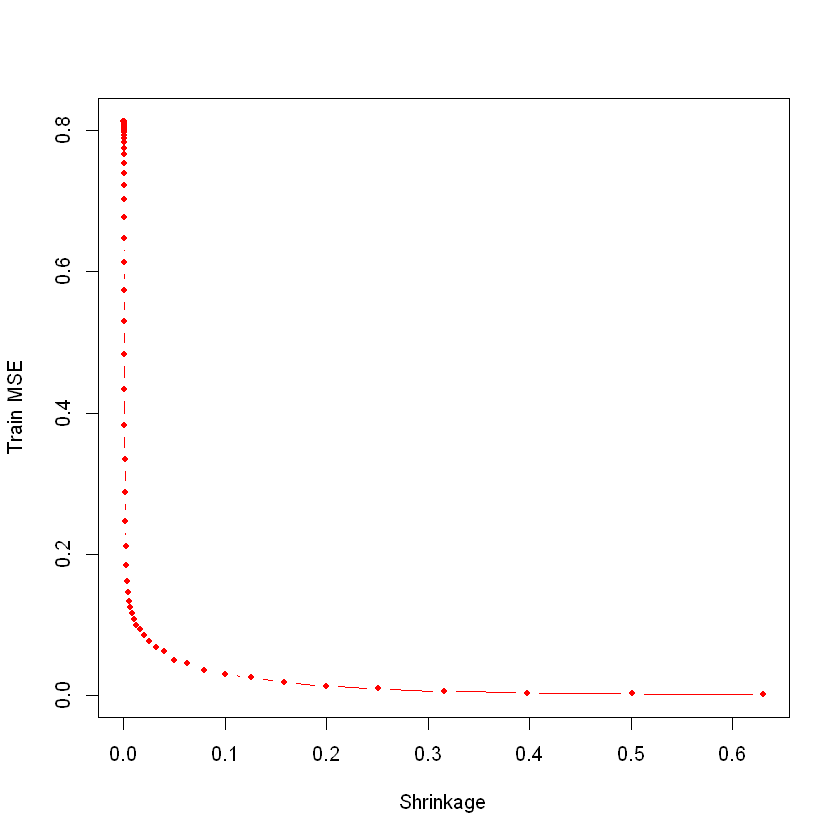

In [14]:
library(gbm)
set.seed(103)
pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows
length.lambdas = length(lambdas)
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)
for (i in 1:length.lambdas) {
    boost.hitters = gbm(Salary ~ ., data = train, distribution = "gaussian", 
        n.trees = 1000, shrinkage = lambdas[i])
    train.pred = predict(boost.hitters, train, n.trees = 1000)
    test.pred = predict(boost.hitters, test, n.trees = 1000)
    train.errors[i] = mean((train$Salary - train.pred)^2)
    test.errors[i] = mean((test$Salary - test.pred)^2)
}

plot(lambdas, train.errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE", col = "red", pch = 20)

### Step (d)

> Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

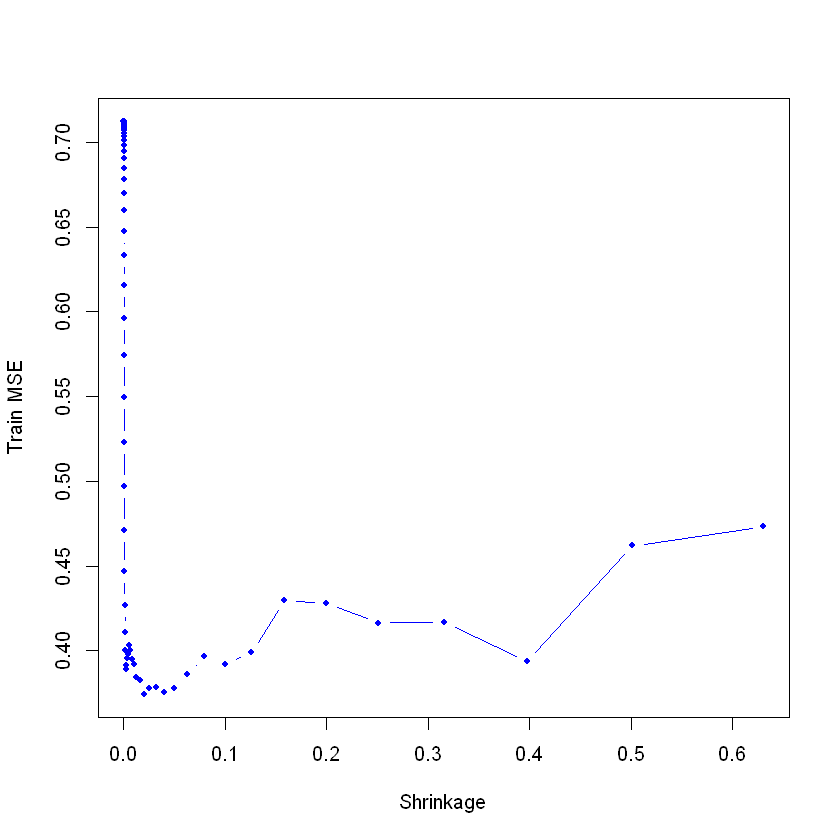

In [15]:
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE", col = "blue", pch = 20)

In [16]:
paste("Minimum test error rate", round(min(test.errors), 2))
paste("Lambda at min test error rate", round(lambdas[which.min(test.errors)], 2))

[1] "Minimum test error rate 0.37"

[1] "Lambda at min test error rate 0.02"

### Step (e)

> Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

In [17]:
# linear model
lm.fit = lm(Salary~., data = train)
lm.pred = predict(lm.fit, test)
lm.ter = mean((test$Salary - lm.pred)^2)
paste("Linear model test error rate", round(lm.ter, 2))

[1] "Linear model test error rate 0.53"

In [18]:
library(glmnet)
set.seed(10)
x.train = model.matrix(Salary~., data = train)
y.train = train$Salary
x.test = model.matrix(Salary~., data=test)

lasso.fit = glmnet(x.train, y.train, alpha=1)
lasso.pred = predict(lasso.fit, s=0.01, newx = x.test)
lasso.ter = mean((test$Salary - lasso.pred)^2)
paste("Lasso model test error rate", round(lasso.ter, 2))

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



[1] "Lasso model test error rate 0.57"

Both Linear Model and Lasso have higher Test MSE than Boosting.

### Step (f)

> Which variables appear to be the most important predictors in the boosted model?

,var,rel.inf
CAtBat,CAtBat,23.45035669
CRBI,CRBI,13.58709561
CRuns,CRuns,13.02268690
Years,Years,10.10106171
CWalks,CWalks,9.14660664
RBI,RBI,4.27905943
CHits,CHits,4.23813372
CHmRun,CHmRun,3.59821916
AtBat,AtBat,3.53265038
Hits,Hits,3.50473275


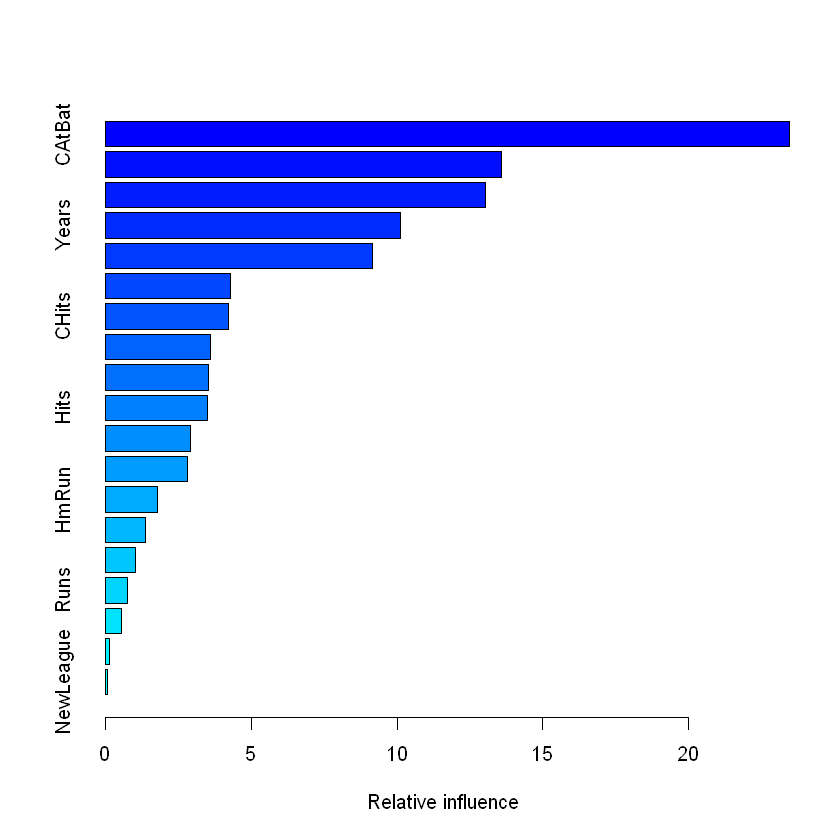

In [19]:
model.bestboost = gbm(Salary~., data=train, distribution="gaussian", n.trees=1000, shrinkage=lambdas[which.min(test.errors)])
summary(model.bestboost)

The most important variables seem to be `CAtBat`, `CRBI` and `CRuns`

### Step (g)

> Now apply bagging to the training set. What is the test set MSE for this approach?

In [20]:
library(randomForest)
rf.model = randomForest(Salary~., data=train, ntree=200, mtry=19)
rf.pred = predict(rf.model, test)
rf.ter = mean((test$Salary - rf.pred)^2)
paste("Random Forest (bagged) model test error rate", round(rf.ter, 2))

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


[1] "Random Forest (bagged) model test error rate 0.41"

## Exercise 11

This question uses the `Caravan` data set.

In [2]:
?Caravan

Caravan {ISLR},R Documentation


### Step (a)

> Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

In [3]:
library(gbm)

# convert the target to binary
Caravan$Purchase = ifelse(Caravan$Purchase == "Yes", 1, 0)

# create train and test
train_index = 0:1000
train = Caravan[train_index,]
test = Caravan[-train_index,]

Loaded gbm 2.1.5


In [4]:
# check dimensions
print(dim(Caravan))
print(dim(train))
print(dim(test))

[1] 5822   86
[1] 1000   86
[1] 4822   86


### Step (b)

> Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees,
and a shrinkage value of 0.01. Which predictors appear to be the most important?

In [24]:
set.seed(11)
# create boosted model
caravan.boost = gbm(Purchase~., data=train, distribution="bernoulli", n.trees=1000, shrinkage = 0.01)

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 50: PVRAAUT has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 71: AVRAAUT has no variation."

The generated error messages tell us that variables PVRAAUT, AVRAAUT don't have any variation. Let's investigate them.


   0    4    6    9 
5813    1    7    1 

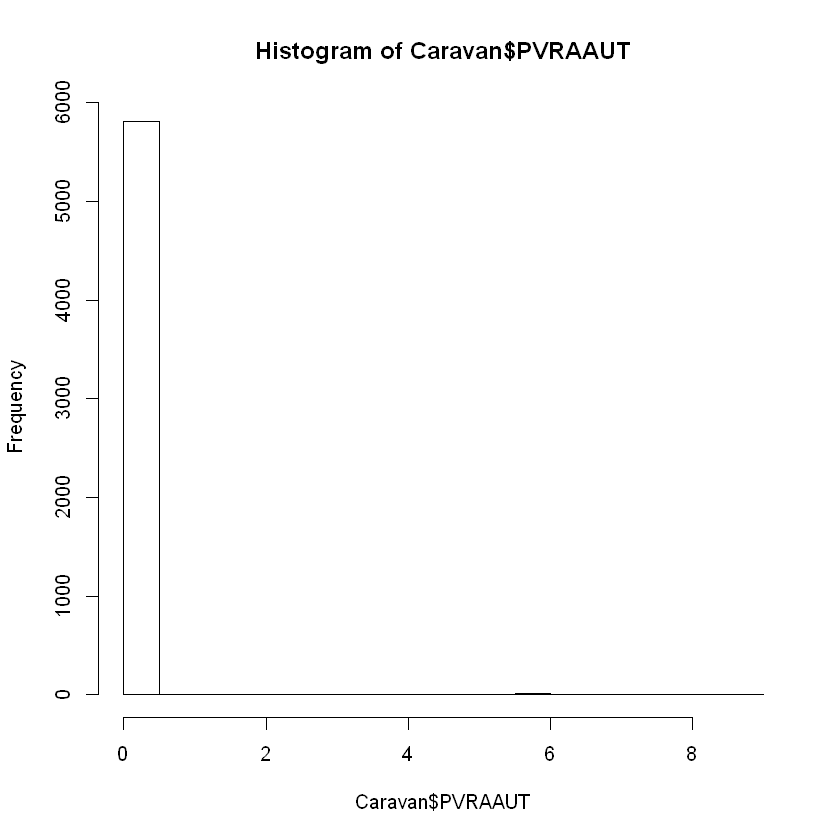


   0    1    2    3 
5813    6    2    1 

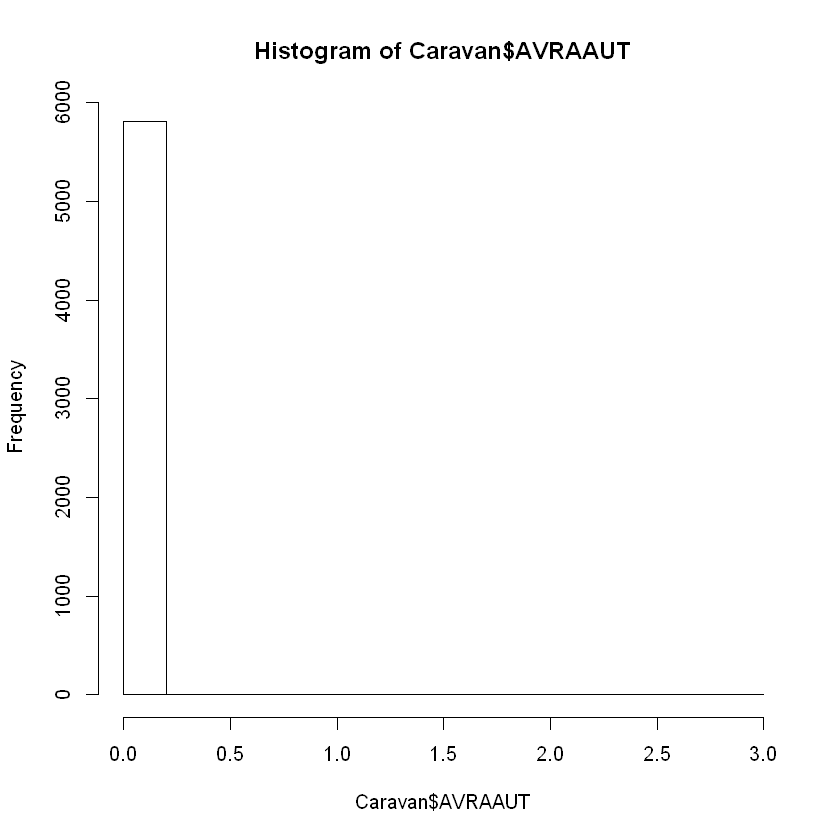

In [25]:
hist(Caravan$PVRAAUT)
table(Caravan$PVRAAUT)
hist(Caravan$AVRAAUT)
table(Caravan$AVRAAUT)

We can observe that despite the majority of values being 0, there are other values present. We won't remove these two features from the model.

Next, let's check which predictors are the most important.

,var,rel.inf
PPERSAUT,PPERSAUT,14.5828317
MKOOPKLA,MKOOPKLA,9.8770592
MOPLHOOG,MOPLHOOG,7.4183828
MBERMIDD,MBERMIDD,6.3755271
PBRAND,PBRAND,4.9602772
MINK3045,MINK3045,4.8791011
MGODGE,MGODGE,4.4770476
ABRAND,ABRAND,4.4327638
MOSTYPE,MOSTYPE,2.8147814
MSKA,MSKA,2.6981273


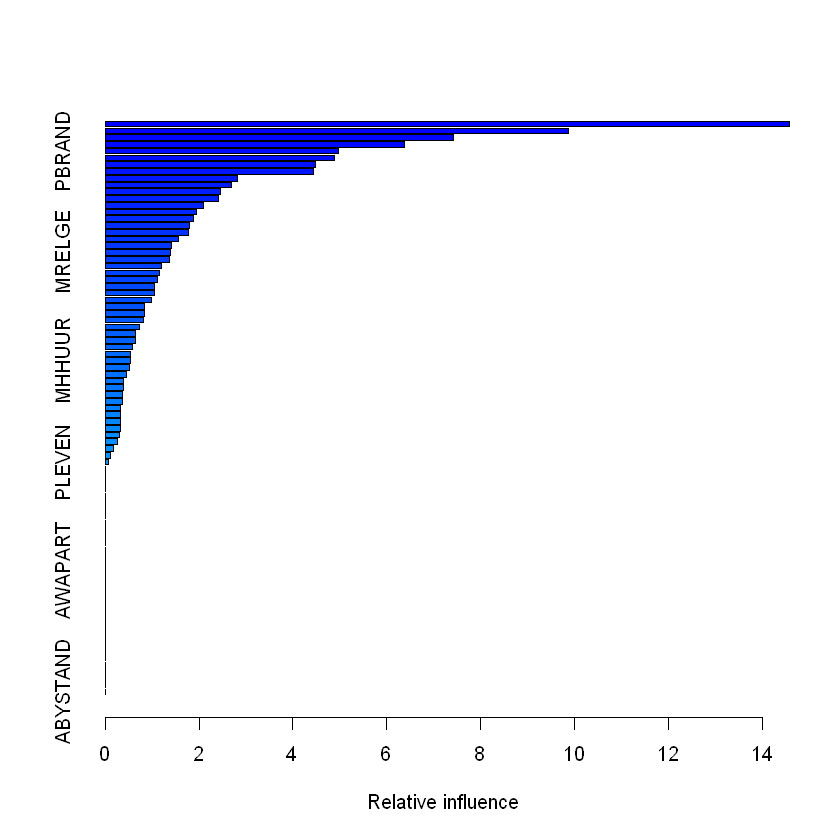

In [26]:
summary(caravan.boost)

From total of 86 predictors the following top 5 are the best predictors according to boosted model:

1. `PPERSAUT` - Contribution car policies
2. `MKOOPKLA` - Purchasing power class
3. `MOPLHOOG` - High level education
4. `MBERMIDD` - Middle management
5. `PBRAND` - Contribution fire policies

### Step (C)

> Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase
do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

Let's first try the boosted model.

In [27]:
# make predictions using boosted model (probabilities)
car.boost.prob = predict(caravan.boost, newdata=test, n.trees=1000, type="response")

# convert probabilities to outcome based on 0.2 threshold
car.boost.pred = ifelse(car.boost.prob > 0.2, 1, 0)

# check confusion matrix
conf.matrix.boost = table(test$Purchase, car.boost.pred)
conf.matrix.boost

   car.boost.pred
       0    1
  0 4408  125
  1  258   31

In [28]:
paste("Precision for Boosted Model is", round(conf.matrix.boost[4] / sum(conf.matrix.boost[c(2, 4)]), 2) * 100, "%")
paste("Accuracy of Boosted Model is", round(sum(conf.matrix.boost[c(1, 4)]) / sum(conf.matrix.boost), 2) * 100, "%")

[1] "Precision for Boosted Model is 11 %"

[1] "Accuracy of Boosted Model is 92 %"

The boosted model predicts that 12% of people predicted to make a purchase actually made one.

Let's try applying KNN and logistic regression to compare results.

In [14]:
# load class library for knn
library(class)

# make predictions from knn
car.knn.pred = knn(train, test, cl=train[, "Purchase"], k=7)

# check confusion matrix
conf.matrix.knn = table(test[,"Purchase"], car.knn.pred)
conf.matrix.knn

   car.knn.pred
       0    1
  0 4519   14
  1  287    2

In [15]:
paste("Precision for KNN Model is", round(conf.matrix.knn[4] / sum(conf.matrix.knn[c(2, 4)]), 2) * 100, "%")
paste("Accuracy of KNN Model is", round(sum(conf.matrix.knn[c(1, 4)]) / sum(conf.matrix.knn), 2) * 100, "%")

[1] "Precision for KNN Model is 1 %"

[1] "Accuracy of KNN Model is 94 %"

We can observe that KNN is performing worse when it comes to correctly predicting customers who make purchase out of all predicted values (precision) knn is performing quite bad.

Next, let's try logistic regression.

In [16]:
# generate logistic regression model
car.log.model = glm(Purchase~., data=train, family=binomial)

# make predictions
car.log.prob = predict(car.log.model, test, type="response")

# convert to binary
car.log.pred = ifelse(car.log.prob > 0.2, 1, 0)

# check confusion matrix
conf.matrix.log = table(test[,"Purchase"], car.log.pred)
conf.matrix.log

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

   car.log.pred
       0    1
  0 4183  350
  1  231   58

In [17]:
paste("Precision for Logistic Regression Model is", round(conf.matrix.log[4] / sum(conf.matrix.log[c(2, 4)]), 2) * 100, "%")
paste("Accuracy of Logistics Regression Model is", round(sum(conf.matrix.log[c(1, 4)]) / sum(conf.matrix.log), 2) * 100, "%")

[1] "Precision for Logistic Regression Model is 20 %"

[1] "Accuracy of Logistics Regression Model is 88 %"

Based on the above results, we can see that the Logistic Regression model has performed much better when it comes to our desired metric - Precision.